# Assignment-1

Q2
[42 points] In this problem, we write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.

1) Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

2) Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.

3) Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of noise_scale.]

4) Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in 2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of number_of_samples.] \

Please use the following code at the beginning of your program to generate the data.

Simulated data is given as follows in Python:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 30(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x*2 + 2 * x*3 + noise_scalenp.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

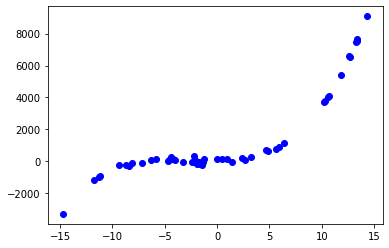

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
noise_scale = 100 
number_of_samples = 50 
x =  30*(np.random.rand(number_of_samples, 1) - 0.5) 
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
plt.plot(x,y,'bo') 




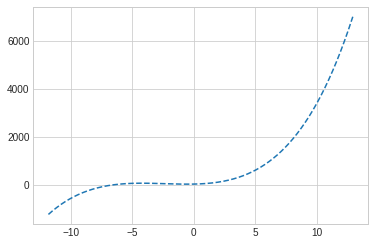

In [11]:
m = 5
coeffs = np.polyfit(np.squeeze(x), np.squeeze(y), m) 
f = np.poly1d(coeffs) 
xx = np.linspace(x.min(), x.max(), 1000) 
yy = f(xx) 
plt.plot(xx, yy, '--') 
plt.show()

plot MSE versus order m:

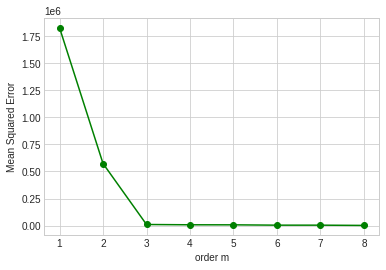

In [10]:
MSE = [] 
for i in range(1, 9): 
    coeffs = np.polyfit(x.flatten(), y.flatten(), i) 
    f = np.poly1d(coeffs) 
    yy = f(x.flatten()) 
    MSE.append(np.mean((yy - y.flatten())**2)) 

plt.plot(range(1, 9), MSE, '-go') 
plt.xlabel('order m') 
plt.ylabel('Mean Squared Error') 
plt.show()


The best choice of m can be determined by observing the order that gives the minimum MSE.

Plot polynomials with different noise scales:

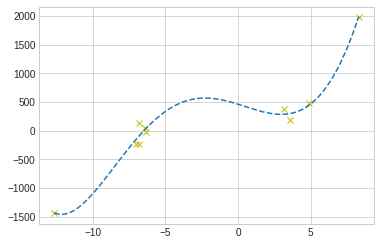

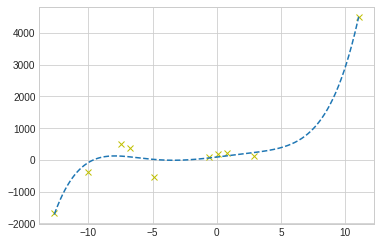

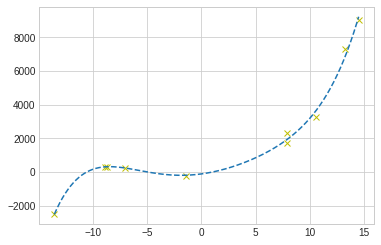

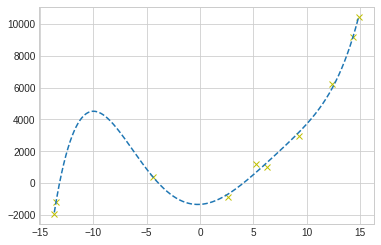

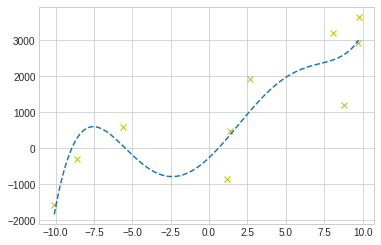

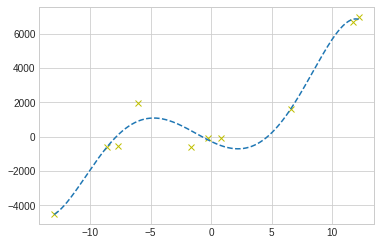

In [12]:
noise_range = [200, 300, 400, 600, 800, 1000] 
for noise_scale in noise_range: 
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5) 
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale * np.random.randn(number_of_samples, 1) 
    plt.plot(x, y, 'yx') 
    coeffs = np.polyfit(x.flatten(), y.flatten(), m) 
    f = np.poly1d(coeffs) 
    xx = np.linspace(x.min(), x.max(), 1000) 
    yy = f(xx) 
    plt.plot(xx, yy, '--') 
    plt.show()


As the noise scale increases, the accuracy of the returned parameters decreases because the noise becomes dominant over the true signal.

Plot polynomials with different number of samples:

In [5]:
number_of_samples = [40, 30, 20, 10] 
for n in number_of_samples: 
    x = 30 * (np.random.rand(n, 1) - 0.5) 
    y = 5 * x + 15 * x**2 + 2 * x


The accuracy of decreses when the noise scale is increased. Accurately fitting the polynomila to the data becomes more challenging as the random noise is added to the data.
the ideal choice for the m for the given data is m=3 

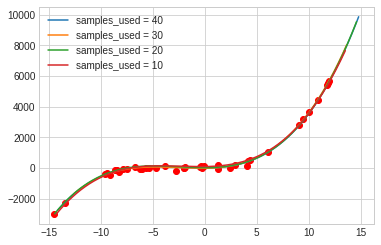

In [13]:
plt.style.use('seaborn-whitegrid') 
noise_scale = 100 
number_of_samples = [40, 30, 20, 10] 
x = 30 * (np.random.rand(number_of_samples[0], 1) - 0.5) 
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples[0], 1) 
plt.plot(x,y,'ro') 

m_best = 3 

for i in range(4):
    number_of_samples = [40, 30, 20, 10][i]
    x = 30 * (np.random.rand(number_of_samples, 1) - 0.5) 
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
    
    coef = np.polyfit(x.ravel(), y.ravel(), m_best) 
    x_fit = np.linspace(x.min(), x.max(), 1000) 
    y_fit = np.polyval(coef, x_fit) 
    plt.plot(x_fit, y_fit, label=f"samples_used = {number_of_samples}") 

plt.legend() 
plt.show() 


The plotted chart demonstrates that the accuracy of the returned parameters reduces as the sample size does. This is due to the fact that when there are fewer samples, the data are less accurate and less indicative of the underlying function. 

For instance, the polynomial fit is closest to the noisy data in the plot with 40 samples, indicating that the calculated parameters are the most accurate. The polynomial fit becomes less precise as the sample sizes increase to 30, 20, and 10, which affects how well the parameters are computed. 

This demonstrates how crucial it is to have a sufficient number of samples available when estimating a function's parameters. The computed parameters could not precisely reflect the underlying function if there aren't enough samples.